In [146]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Ознакомление с изображениями

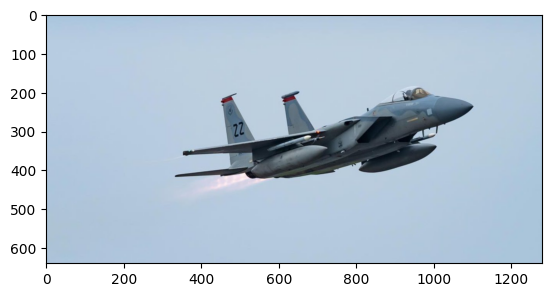

In [147]:
plane = cv2.imread('data/plane/plane.jpg')
plt.imshow(cv2.cvtColor(plane, cv2.COLOR_BGR2RGB))

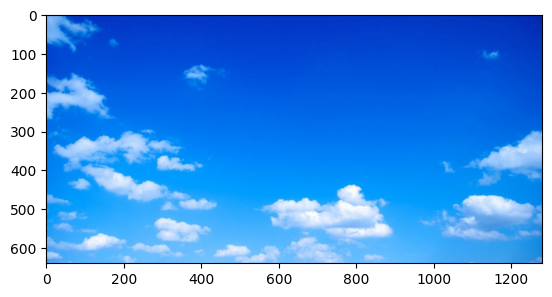

In [148]:
sky = cv2.imread('data/plane/sky.jpg')
plt.imshow(cv2.cvtColor(sky, cv2.COLOR_BGR2RGB))

## Построение композиции изображений

Задание маски

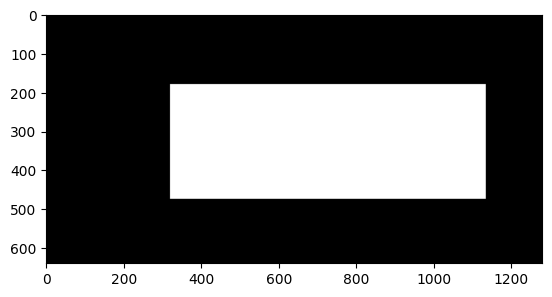

In [149]:
mask = np.zeros(plane.shape[:])
left, right, top, bot = 320, 1135, 180, 475
mask[top:bot, left:right] = 1
plt.imshow(mask, cmap = 'gray')

In [150]:
level = 7

Итеративное уменьшение размеров изображения путем применения свертки с Гауссовским ядром и выборки нечетных строк и столбцов из полученного

In [151]:
for i in range(level):
    mask = cv2.pyrDown(mask)

Итеративное увеличение размеров изображения путем лобавления строк и столбцов заполненных нулями и  применения свертки с Гауссовы ядром, помноженным на 4

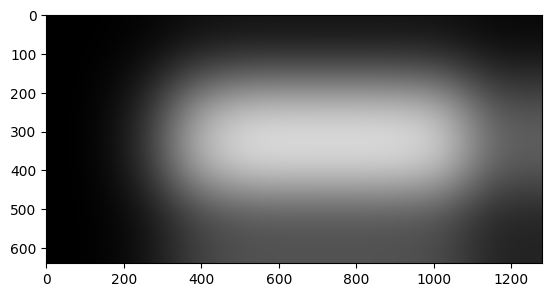

In [152]:
for i in range(level):
    mask = cv2.pyrUp(mask)

plt.imshow(mask, cmap = 'gray')

Применение маски для объединения изображений

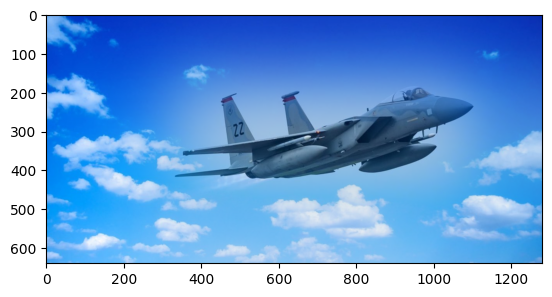

In [153]:
image = plane*mask + sky*(1 - mask)
image = np.uint8(np.round(image))

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

## Композиция изображений с помощью пирамид Гаусса и Лапласса

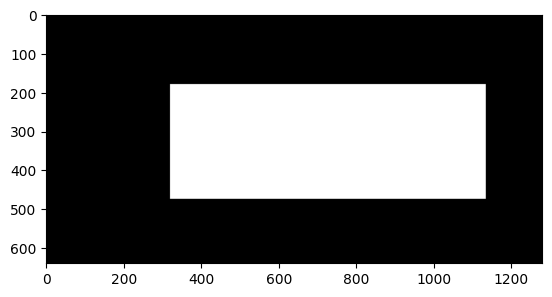

In [154]:
mask = np.zeros(plane.shape[:])
mask[top:bot, left:right] = 1

plt.imshow(mask, cmap = 'gray')

Функция построения пирамиды Гаусса и функция построения пирамиды Лапласса

In [155]:
def gauss_pyr(img, level):
    temp = img.copy()
    output = [img]

    for i in range(level):
        dst = cv2.pyrDown(temp)
        output.append(dst) 
        temp = dst
        
    return output 


def laplace_pyr(Gauss_images):
    level = len(Gauss_images)
    output = [Gauss_images[-1]]

    for i in range(level - 2, -1, -1):
        up_image = cv2.pyrUp(Gauss_images[i + 1])
        dst = cv2.subtract(Gauss_images[i], up_image)
        output.append(dst)
        
    return output

Построение пирамид для изображений

In [156]:
gauss_plane = gauss_pyr(plane, level)
laplace_plane = laplace_pyr(gauss_plane)

gauss_sky = gauss_pyr(sky, level)
laplace_sky = laplace_pyr(gauss_sky)

Объединение изображений на всех уровнях пирамиды

In [157]:
arr = (top/sky.shape[0], bot/sky.shape[0], left/sky.shape[1], right/sky.shape[1])

for i in range(len(laplace_sky)):
    sh = np.shape(laplace_sky[i])
    
    laplace_sky[i][round(arr[0]*sh[0]):round(arr[1]*sh[0]), round(arr[2]*sh[1]):round(arr[3]*sh[1])] = \
    laplace_plane[i][round(arr[0]*sh[0]):round(arr[1]*sh[0]), round(arr[2]*sh[1]):round(arr[3]*sh[1])]

Восстаноление изображений на всех уровнях

255

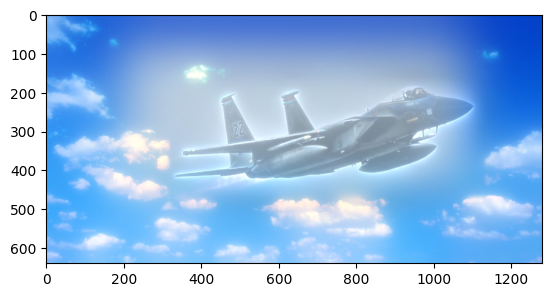

In [158]:
I = [laplace_sky[0]]
temp = laplace_sky[0]

for i in range(level):
    temp = cv2.add(cv2.pyrUp(temp), laplace_sky[i + 1])
    I.append(temp)

plt.imshow(cv2.cvtColor(I[-1], cv2.COLOR_BGR2RGB))
np.max(I[-1])